# PyPSA Beispiel 4

### a. PV-Anlage vs. Flachkollektoren

Importieren Sie die notwendigen Bibliotheken und lesen Sie die Input Daten ein ('data_PyPSA_04.csv')

In [4]:
import numpy as np
import pandas as pd
import pypsa

In [5]:
df_data = pd.read_csv('Input/data_PyPSA_04.csv')

<Axes: >

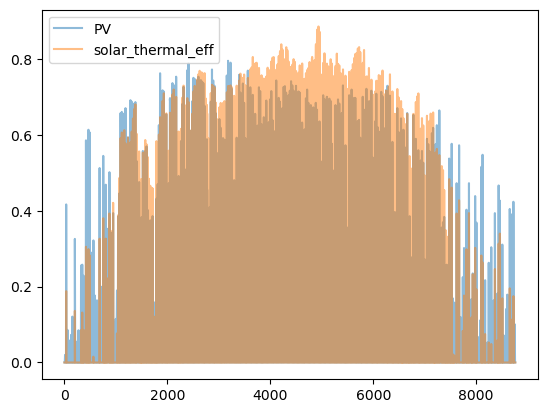

In [6]:
df_data.loc[:,["PV","solar_thermal_eff"]].plot(alpha=0.5)

Implementieren Sie das Basissystem, sowie die PV-Anlage, die Flachkollektoren und den Heizstab.

In [7]:
boiler_p_nom        = np.inf
boiler_eff          = 0.85
gas_rate            = 0.123 #€/kWh

electricity_rate    = 0.409 #€/kWh
grid_p_nom          = 15    #kW 

interest_rate       = 0.02

pv_invest           = 1000  #€/kWp
pv_lifespan         = 25    #Jahre
pv_annuity          = pv_invest*((1+interest_rate)**pv_lifespan)*interest_rate/((1+interest_rate)**pv_lifespan-1)
pv_p_per_m2         = 0.2   #kWp/m2

heating_rod_eff     = 0.99  #Effizienz des Heizstabes
heating_rod_p_nom   = 3     #Leistung des Heizstabes in kW

col_invest          = 600   #€/kW_th (Spitzenlast bei G = 1000 W/m2 und 35° Neigung Südausrichtung)
col_lifespan        = 20    #Jahre
col_annuity         = col_invest*((1+interest_rate)**col_lifespan)*interest_rate/((1+interest_rate)**col_lifespan-1)
col_p_per_m2        = 0.805 #kWp_th/m2 (Bei 35° Dachneigung Südseite)

heat_store_loss     = 0.005
heat_store_e_nom    = 8.55   # kWh (entspricht einem 300 l Pufferspeicher bei einer Temperaturspreizung von 25 K)

In [8]:
network = pypsa.Network()
network.set_snapshots(df_data.index)

network.add('Bus', name = 'thermal')
network.add('Bus', name = 'electricity')

network.add('Load', name = 'heating_load', 
            bus = 'thermal', 
            p_set = df_data["heat_load"])
network.add('Load', name = 'electrical_load', 
            bus = 'electricity', 
            p_set = df_data["electrical_load"])


network.add('Generator', name = 'grid',
            bus = 'electricity',
            p_nom = grid_p_nom,
            marginal_cost = electricity_rate)
network.add('Generator',  name = 'boiler',
            bus = 'thermal', 
            p_nom = boiler_p_nom, 
            marginal_cost = gas_rate/boiler_eff)
network.add('Generator', name = 'PV',
            bus = 'electricity', 
            p_nom_extendable = True, 
            capital_cost = pv_annuity, 
            p_max_pu = df_data["PV"])
network.add('Generator', name = 'collector', 
            bus = 'thermal', 
            p_nom_extendable = True, 
            capital_cost = col_annuity, 
            p_max_pu = df_data["solar_thermal_eff"])

network.add('Link', name = 'heating_rod',
            bus0 = 'electricity', 
            bus1 = 'thermal', 
            p_nom = heating_rod_p_nom,  
            efficiency = heating_rod_eff)

network.add('Store',  name = 'heat_store',
            bus = 'thermal', 
            e_nom = heat_store_e_nom, 
            standing_loss = heat_store_loss)

Index(['heat_store'], dtype='object')

Optimieren Sie das System zunächst ohne Begrenzung der Dachfläche

In [9]:
network.optimize(solver_name="gurobi", method = 1, threads = 1)

Index(['heating_rod'], dtype='object', name='Link')
Index(['heat_store'], dtype='object', name='Store')
Index(['thermal', 'electricity'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - method: 1
 - threads: 1
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 5/5 [00:00<00:00, 37.28it/s]
INFO:linopy.io: Writing time: 0.73s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2694931


INFO:gurobipy:Set parameter LicenseID to value 2694931


Academic license - for non-commercial use only - expires 2026-08-11


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-11


Read LP format model from file C:\Users\sarah\AppData\Local\Temp\linopy-problem-2rvowgyt.lp


INFO:gurobipy:Read LP format model from file C:\Users\sarah\AppData\Local\Temp\linopy-problem-2rvowgyt.lp


Reading time = 0.17 seconds


INFO:gurobipy:Reading time = 0.17 seconds


obj: 122642 rows, 61322 columns, 191151 nonzeros


INFO:gurobipy:obj: 122642 rows, 61322 columns, 191151 nonzeros


Set parameter Method to value 1


INFO:gurobipy:Set parameter Method to value 1


Set parameter Threads to value 1


INFO:gurobipy:Set parameter Threads to value 1


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 7 5800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 7 5800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 8 physical cores, 16 logical processors, using up to 1 threads


INFO:gurobipy:Thread count: 8 physical cores, 16 logical processors, using up to 1 threads


INFO:gurobipy:


Non-default parameters:


INFO:gurobipy:Non-default parameters:


Method  1


INFO:gurobipy:Method  1


Threads  1


INFO:gurobipy:Threads  1


INFO:gurobipy:


Optimize a model with 122642 rows, 61322 columns and 191151 nonzeros


INFO:gurobipy:Optimize a model with 122642 rows, 61322 columns and 191151 nonzeros


Model fingerprint: 0x1b4aec0c


INFO:gurobipy:Model fingerprint: 0x1b4aec0c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 1e+00]


INFO:gurobipy:  Matrix range     [1e-03, 1e+00]


  Objective range  [1e-01, 5e+01]


INFO:gurobipy:  Objective range  [1e-01, 5e+01]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [2e-03, 2e+01]


INFO:gurobipy:  RHS range        [2e-03, 2e+01]


Presolve removed 102585 rows and 28391 columns


INFO:gurobipy:Presolve removed 102585 rows and 28391 columns


Presolve time: 0.11s


INFO:gurobipy:Presolve time: 0.11s


Presolved: 20057 rows, 32931 columns, 60077 nonzeros


INFO:gurobipy:Presolved: 20057 rows, 32931 columns, 60077 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0    8.8055226e+02   5.537631e+04   0.000000e+00      0s


INFO:gurobipy:       0    8.8055226e+02   5.537631e+04   0.000000e+00      0s


   11974    3.9848565e+03   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:   11974    3.9848565e+03   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 11974 iterations and 0.53 seconds (0.92 work units)


INFO:gurobipy:Solved in 11974 iterations and 0.53 seconds (0.92 work units)


Optimal objective  3.984856519e+03


INFO:gurobipy:Optimal objective  3.984856519e+03
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 61322 primals, 122642 duals
Objective: 3.98e+03
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance were not assigned to the network.


('ok', 'optimal')

Lassen Sie sich die Auslegung der PV-Anlage sowie der Flachkollektoren ausgeben und berechnen Sie die benötigte Dachfläche

In [10]:
network.generators.p_nom_opt

Generator
grid         15.000000
boiler             inf
PV            5.601445
collector     1.845980
Name: p_nom_opt, dtype: float64

In [11]:
print("PV:", round(network.generators.p_nom_opt.PV / pv_p_per_m2,2),"m2")
print("Flachkollektor:",round(network.generators.p_nom_opt.collector / col_p_per_m2,2),"m2")

PV: 28.01 m2
Flachkollektor: 2.29 m2


<Axes: xlabel='snapshot'>

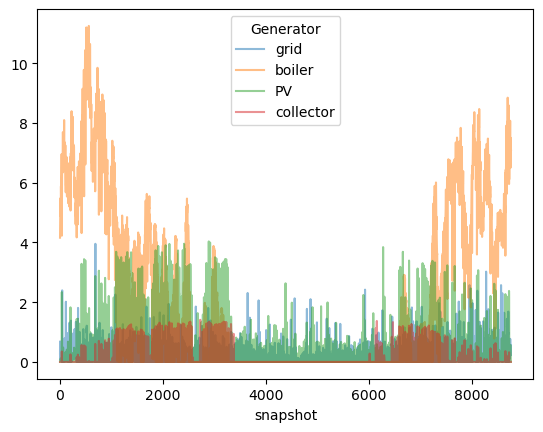

In [12]:
network.generators_t.p.plot(alpha=0.5)

Erstellen Sie nun eine Custom Constraint, welche die Dachflächen-Limitierung abbildet. <br>
Erstellen Sie hierzu zunächst eine Kopie des PyPSA Netzwerks als Modell. <br>
Fügen Sie diesem Modell eine Nebenbedingung hinzu und lösen Sie das Modell.

In [13]:
model = network.optimize.create_model()

Index(['heating_rod'], dtype='object', name='Link')
Index(['heat_store'], dtype='object', name='Store')
Index(['thermal', 'electricity'], dtype='object', name='Bus')


In [14]:
model_pv_p_nom = model.variables['Generator-p_nom'].at['PV']
model_col_p_nom = model.variables['Generator-p_nom'].at['collector']

constraint_expression = model_pv_p_nom/pv_p_per_m2 +  model_col_p_nom/col_p_per_m2 <= 20 
model.add_constraints(constraint_expression, name = 'Flächenbegrenzung')

Constraint `Flächenbegrenzung`
------------------------------
+5 Generator-p_nom[PV] + 1.242 Generator-p_nom[collector] ≤ 20

Lassen Sie sich erneut die Auslegung ausgeben und berechnen Sie ob die Dachflächenlimitierung eingehalten wurde

In [15]:
network.optimize.solve_model(solver_name='gurobi', threads = 1, method = 1)

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - threads: 1
 - method: 1
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 5/5 [00:00<00:00, 36.73it/s]
INFO:linopy.io: Writing time: 0.74s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2694931


INFO:gurobipy:Set parameter LicenseID to value 2694931


Academic license - for non-commercial use only - expires 2026-08-11


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-11


Read LP format model from file C:\Users\sarah\AppData\Local\Temp\linopy-problem-5yn0_ni9.lp


INFO:gurobipy:Read LP format model from file C:\Users\sarah\AppData\Local\Temp\linopy-problem-5yn0_ni9.lp


Reading time = 0.18 seconds


INFO:gurobipy:Reading time = 0.18 seconds


obj: 122643 rows, 61322 columns, 191153 nonzeros


INFO:gurobipy:obj: 122643 rows, 61322 columns, 191153 nonzeros


Set parameter Threads to value 1


INFO:gurobipy:Set parameter Threads to value 1


Set parameter Method to value 1


INFO:gurobipy:Set parameter Method to value 1


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 7 5800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 7 5800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 8 physical cores, 16 logical processors, using up to 1 threads


INFO:gurobipy:Thread count: 8 physical cores, 16 logical processors, using up to 1 threads


INFO:gurobipy:


Non-default parameters:


INFO:gurobipy:Non-default parameters:


Method  1


INFO:gurobipy:Method  1


Threads  1


INFO:gurobipy:Threads  1


INFO:gurobipy:


Optimize a model with 122643 rows, 61322 columns and 191153 nonzeros


INFO:gurobipy:Optimize a model with 122643 rows, 61322 columns and 191153 nonzeros


Model fingerprint: 0x689bdcd7


INFO:gurobipy:Model fingerprint: 0x689bdcd7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+00]


INFO:gurobipy:  Matrix range     [1e-03, 5e+00]


  Objective range  [1e-01, 5e+01]


INFO:gurobipy:  Objective range  [1e-01, 5e+01]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [2e-03, 2e+01]


INFO:gurobipy:  RHS range        [2e-03, 2e+01]


Presolve removed 105177 rows and 32283 columns


INFO:gurobipy:Presolve removed 105177 rows and 32283 columns


Presolve time: 0.10s


INFO:gurobipy:Presolve time: 0.10s


Presolved: 17466 rows, 29039 columns, 52346 nonzeros


INFO:gurobipy:Presolved: 17466 rows, 29039 columns, 52346 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0    1.1530578e+03   2.911081e+04   0.000000e+00      0s


INFO:gurobipy:       0    1.1530578e+03   2.911081e+04   0.000000e+00      0s


    7849    4.0078048e+03   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    7849    4.0078048e+03   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 7849 iterations and 0.19 seconds (0.29 work units)


INFO:gurobipy:Solved in 7849 iterations and 0.19 seconds (0.29 work units)


Optimal objective  4.007804845e+03


INFO:gurobipy:Optimal objective  4.007804845e+03
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 61322 primals, 122643 duals
Objective: 4.01e+03
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, Store-energy_balance, Flächenbegrenzung were not assigned to the network.


('ok', 'optimal')

In [16]:
print("PV: \n",round(network.generators.p_nom_opt.PV,),"kWp \n", round(network.generators.p_nom_opt.PV / pv_p_per_m2,2),"m2")
print("Flachkollektor: \n",round(network.generators.p_nom_opt.collector,2),"max. kW_th \n",round(network.generators.p_nom_opt.collector / col_p_per_m2,2),"m2")

PV: 
 3 kWp 
 16.98 m2
Flachkollektor: 
 2.43 max. kW_th 
 3.02 m2


### b. Wärmepumpe

Implementieren Sie nun die Wärmepumpe. <br>
Verwenden Sie hierzu die selben Daten wie aus Übung PyPSA 03. <br> 
Beachten Sie dieses mal jedoch zusätzlich die minimale thermische Leistung über das Attribut 'p_min_pu'.

In [17]:
T_VL        =   55 #°C
temp        =   [ -20, -15, -10,  -7,   2,   7,  10,  20,  30,  35] #°C
el_power    =   [3.87,4.20,4.45,4.60,2.25,2.23,2.27,2.33,2.27,2.27] #kW
cop         =   [1.81,1.98,2.18,2.30,2.83,3.40,3.66,4.80,6.37,6.37]
min_th_p    =   [2.70,2.74,2.48,2.32,3.03,3.51,3.84,5.07,6.10,6.10] #kW
hp_p_nom    =   1.56 #kW

<Axes: >

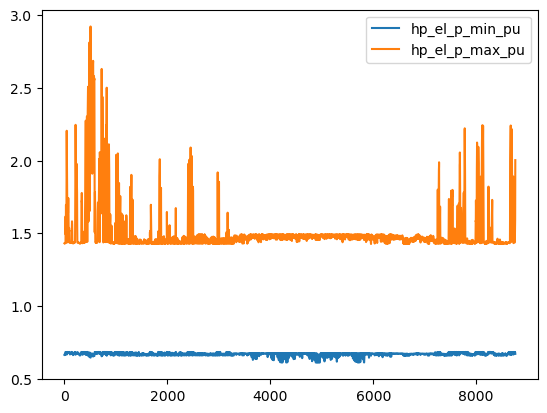

In [18]:
df_data["hp_th_p_min"]     = np.interp(df_data['temperature'],temp,min_th_p)
df_data["hp_el_p_min_pu"]  = (df_data['hp_th_p_min'] / (df_data["hp_COP"] * hp_p_nom)) 
df_data.loc[:,["hp_el_p_min_pu","hp_el_p_max_pu"]].plot()

In [19]:
heatpump_eff        = df_data["hp_COP"] 
heatpump_p_max_pu   = df_data["hp_el_p_max_pu"] 
heatpump_p_min_pu   = df_data["hp_el_p_min_pu"]

network.add('Link', name = 'heatpump', 
            bus0 = 'electricity', 
            bus1 = 'thermal',
            p_nom = hp_p_nom, 
            committable = True,  
            p_max_pu = heatpump_p_max_pu,
            p_min_pu = heatpump_p_min_pu, 
            efficiency = heatpump_eff)

Index(['heatpump'], dtype='object')

Erstellen Sie nun erneut eine Kopie des Netzwerks als Modell und fügen Sie diesem neben der Flächenbegrenzung ebenfalls eine Nebenbedingung zur Einhaltung des GEG hinzu.<br>
(Der Heizstab soll als nicht erneuerbare Technologie betrachtet werden)

In [20]:
model = network.optimize.create_model()
#Flächenbegrenzung
model_pv_p_nom  = model.variables["Generator-p_nom"].at['PV']
model_col_p_nom = model.variables["Generator-p_nom"].at['collector']

constraint_expression = 20 >= model_pv_p_nom/pv_p_per_m2 + model_col_p_nom/col_p_per_m2
model.add_constraints(constraint_expression, name="Flächenbegrenzung")

#65% EE
model_boiler_p  = model.variables["Generator-p"].sel(Generator='boiler')
model_hr_p      = model.variables["Link-p"].sel(Link='heating_rod')
con_ee_limit = (sum(model_boiler_p[t] + model_hr_p[t]*heating_rod_eff 
                    for t in df_data.index) 
                <= 0.35 * df_data["heat_load"].sum())
model.add_constraints(con_ee_limit, name="EE-Limit")

Index(['heating_rod', 'heatpump'], dtype='object', name='Link')
Index(['heat_store'], dtype='object', name='Store')
Index(['thermal', 'electricity'], dtype='object', name='Bus')
C:\Users\sarah\anaconda3\Lib\site-packages\linopy\variables.py:197: FutureWarning:

Accessing a single value with `Variable[...]` and return type ScalarVariable is deprecated. In future, this will return a Variable.To get a ScalarVariable use `Variable.at[...]` instead.



Constraint `EE-Limit`
---------------------
+1 Generator-p[0, boiler] + 0.99 Link-p[0, heating_rod] + 1 Generator-p[1, boiler] ... +0.99 Link-p[8758, heating_rod] + 1 Generator-p[8759, boiler] + 0.99 Link-p[8759, heating_rod] ≤ 7851.441290000001

Lösen Sie das Modell

In [21]:
network.optimize.solve_model(solver_name='gurobi', method = 1, threads = 1)

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - method: 1
 - threads: 1
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 103.35it/s]
INFO:linopy.io: Writing time: 1.11s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2694931


INFO:gurobipy:Set parameter LicenseID to value 2694931


Academic license - for non-commercial use only - expires 2026-08-11


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-11


Read LP format model from file C:\Users\sarah\AppData\Local\Temp\linopy-problem-oa0l8by3.lp


INFO:gurobipy:Read LP format model from file C:\Users\sarah\AppData\Local\Temp\linopy-problem-oa0l8by3.lp


Reading time = 0.24 seconds


INFO:gurobipy:Reading time = 0.24 seconds


obj: 157684 rows, 96362 columns, 313791 nonzeros


INFO:gurobipy:obj: 157684 rows, 96362 columns, 313791 nonzeros


Set parameter Method to value 1


INFO:gurobipy:Set parameter Method to value 1


Set parameter Threads to value 1


INFO:gurobipy:Set parameter Threads to value 1


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 7 5800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 7 5800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 8 physical cores, 16 logical processors, using up to 1 threads


INFO:gurobipy:Thread count: 8 physical cores, 16 logical processors, using up to 1 threads


INFO:gurobipy:


Non-default parameters:


INFO:gurobipy:Non-default parameters:


Method  1


INFO:gurobipy:Method  1


Threads  1


INFO:gurobipy:Threads  1


INFO:gurobipy:


Optimize a model with 157684 rows, 96362 columns and 313791 nonzeros


INFO:gurobipy:Optimize a model with 157684 rows, 96362 columns and 313791 nonzeros


Model fingerprint: 0x23dd2c6f


INFO:gurobipy:Model fingerprint: 0x23dd2c6f


Variable types: 70082 continuous, 26280 integer (26280 binary)


INFO:gurobipy:Variable types: 70082 continuous, 26280 integer (26280 binary)


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+00]


INFO:gurobipy:  Matrix range     [1e-03, 6e+00]


  Objective range  [1e-01, 5e+01]


INFO:gurobipy:  Objective range  [1e-01, 5e+01]


  Bounds range     [1e+00, 1e+00]


INFO:gurobipy:  Bounds range     [1e+00, 1e+00]


  RHS range        [2e-03, 8e+03]


INFO:gurobipy:  RHS range        [2e-03, 8e+03]


Presolve removed 128198 rows and 57958 columns


INFO:gurobipy:Presolve removed 128198 rows and 57958 columns


Presolve time: 0.24s


INFO:gurobipy:Presolve time: 0.24s


Presolved: 29486 rows, 38404 columns, 109025 nonzeros


INFO:gurobipy:Presolved: 29486 rows, 38404 columns, 109025 nonzeros


Variable types: 29644 continuous, 8760 integer (8760 binary)


INFO:gurobipy:Variable types: 29644 continuous, 8760 integer (8760 binary)


INFO:gurobipy:


Root relaxation: objective 3.594071e+03, 14239 iterations, 0.13 seconds (0.22 work units)


INFO:gurobipy:Root relaxation: objective 3.594071e+03, 14239 iterations, 0.13 seconds (0.22 work units)


INFO:gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy:


     0     0 3594.07135    0 1131          - 3594.07135      -     -    1s


INFO:gurobipy:     0     0 3594.07135    0 1131          - 3594.07135      -     -    1s


     0     0 3605.06565    0  685          - 3605.06565      -     -    2s


INFO:gurobipy:     0     0 3605.06565    0  685          - 3605.06565      -     -    2s


     0     0 3605.38085    0  632          - 3605.38085      -     -    2s


INFO:gurobipy:     0     0 3605.38085    0  632          - 3605.38085      -     -    2s


     0     0 3605.42964    0  632          - 3605.42964      -     -    2s


INFO:gurobipy:     0     0 3605.42964    0  632          - 3605.42964      -     -    2s


     0     0 3606.52045    0  444          - 3606.52045      -     -    2s


INFO:gurobipy:     0     0 3606.52045    0  444          - 3606.52045      -     -    2s


     0     0 3606.57463    0  432          - 3606.57463      -     -    2s


INFO:gurobipy:     0     0 3606.57463    0  432          - 3606.57463      -     -    2s


     0     0 3606.57693    0  439          - 3606.57693      -     -    2s


INFO:gurobipy:     0     0 3606.57693    0  439          - 3606.57693      -     -    2s


     0     0 3606.77886    0  351          - 3606.77886      -     -    2s


INFO:gurobipy:     0     0 3606.77886    0  351          - 3606.77886      -     -    2s


     0     0 3606.80513    0  343          - 3606.80513      -     -    2s


INFO:gurobipy:     0     0 3606.80513    0  343          - 3606.80513      -     -    2s


     0     0 3606.80968    0  335          - 3606.80968      -     -    2s


INFO:gurobipy:     0     0 3606.80968    0  335          - 3606.80968      -     -    2s


     0     0 3606.80974    0  335          - 3606.80974      -     -    2s


INFO:gurobipy:     0     0 3606.80974    0  335          - 3606.80974      -     -    2s


     0     0 3606.85213    0  271          - 3606.85213      -     -    3s


INFO:gurobipy:     0     0 3606.85213    0  271          - 3606.85213      -     -    3s


     0     0 3606.85441    0  265          - 3606.85441      -     -    3s


INFO:gurobipy:     0     0 3606.85441    0  265          - 3606.85441      -     -    3s


     0     0 3606.85986    0  256          - 3606.85986      -     -    3s


INFO:gurobipy:     0     0 3606.85986    0  256          - 3606.85986      -     -    3s


     0     0 3606.86400    0  264          - 3606.86400      -     -    3s


INFO:gurobipy:     0     0 3606.86400    0  264          - 3606.86400      -     -    3s


     0     0 3606.86400    0  268          - 3606.86400      -     -    3s


INFO:gurobipy:     0     0 3606.86400    0  268          - 3606.86400      -     -    3s


     0     0 3606.86561    0  259          - 3606.86561      -     -    3s


INFO:gurobipy:     0     0 3606.86561    0  259          - 3606.86561      -     -    3s


H    0     0                    3609.4693111 3606.86561  0.07%     -    4s


INFO:gurobipy:H    0     0                    3609.4693111 3606.86561  0.07%     -    4s


H    0     0                    3609.2923590 3606.86561  0.07%     -    4s


INFO:gurobipy:H    0     0                    3609.2923590 3606.86561  0.07%     -    4s


     0     2 3606.86766    0  257 3609.29236 3606.86766  0.07%     -    5s


INFO:gurobipy:     0     2 3606.86766    0  257 3609.29236 3606.86766  0.07%     -    5s


H   27    27                    3609.1274111 3606.89625  0.06%  76.9    5s


INFO:gurobipy:H   27    27                    3609.1274111 3606.89625  0.06%  76.9    5s


H   54    54                    3608.9868172 3606.89625  0.06%  40.6    6s


INFO:gurobipy:H   54    54                    3608.9868172 3606.89625  0.06%  40.6    6s


H  548   548                    3608.9484300 3606.89625  0.06%   8.7    9s


INFO:gurobipy:H  548   548                    3608.9484300 3606.89625  0.06%   8.7    9s


H  548   548                    3608.7899808 3606.89625  0.05%   8.7    9s


INFO:gurobipy:H  548   548                    3608.7899808 3606.89625  0.05%   8.7    9s


   692   694 3607.92205  504   21 3608.78998 3606.89625  0.05%   8.4   10s


INFO:gurobipy:   692   694 3607.92205  504   21 3608.78998 3606.89625  0.05%   8.4   10s


H  993   951                    3607.9782031 3606.89625  0.03%   6.8   11s


INFO:gurobipy:H  993   951                    3607.9782031 3606.89625  0.03%   6.8   11s


H 1255  1169                    3607.9573906 3606.89625  0.03%   6.6   13s


INFO:gurobipy:H 1255  1169                    3607.9573906 3606.89625  0.03%   6.6   13s


  1264  1171 3607.84025  304  259 3607.95739 3606.89791  0.03%   6.6   15s


INFO:gurobipy:  1264  1171 3607.84025  304  259 3607.95739 3606.89791  0.03%   6.6   15s


  1289  1188 3607.25769    4  201 3607.95739 3607.25769  0.02%   6.5   20s


INFO:gurobipy:  1289  1188 3607.25769    4  201 3607.95739 3607.25769  0.02%   6.5   20s


  1315  1206 3607.92205  618 1102 3607.95739 3607.28557  0.02%  31.0   25s


INFO:gurobipy:  1315  1206 3607.92205  618 1102 3607.95739 3607.28557  0.02%  31.0   25s


  1332  1218 3607.29877   26  169 3607.95739 3607.28727  0.02%  30.6   30s


INFO:gurobipy:  1332  1218 3607.29877   26  169 3607.95739 3607.28727  0.02%  30.6   30s


H 1338  1160                    3607.9378969 3607.28727  0.02%  30.4   32s


INFO:gurobipy:H 1338  1160                    3607.9378969 3607.28727  0.02%  30.4   32s


H 1338  1102                    3607.9365850 3607.28727  0.02%  30.4   32s


INFO:gurobipy:H 1338  1102                    3607.9365850 3607.28727  0.02%  30.4   32s


H 1338  1046                    3607.8194035 3607.28727  0.01%  30.4   33s


INFO:gurobipy:H 1338  1046                    3607.8194035 3607.28727  0.01%  30.4   33s


  1366  1065 3607.29662   40  150 3607.81940 3607.28991  0.01%  53.8   35s


INFO:gurobipy:  1366  1065 3607.29662   40  150 3607.81940 3607.28991  0.01%  53.8   35s


H 1417  1040                    3607.6974278 3607.28991  0.01%  52.3   36s


INFO:gurobipy:H 1417  1040                    3607.6974278 3607.28991  0.01%  52.3   36s


H 1443  1004                    3607.6896625 3607.28991  0.01%  51.5   37s


INFO:gurobipy:H 1443  1004                    3607.6896625 3607.28991  0.01%  51.5   37s


H 1443   957                    3607.6896558 3607.28991  0.01%  51.5   37s


INFO:gurobipy:H 1443   957                    3607.6896558 3607.28991  0.01%  51.5   37s


  1528  1001 3607.56670  121  108 3607.68966 3607.28991  0.01%  49.3   40s


INFO:gurobipy:  1528  1001 3607.56670  121  108 3607.68966 3607.28991  0.01%  49.3   40s


  1798  1142 3607.43441   46  135 3607.68966 3607.29010  0.01%  43.1   45s


INFO:gurobipy:  1798  1142 3607.43441   46  135 3607.68966 3607.29010  0.01%  43.1   45s


  2133  1325 3607.65873  220   24 3607.68966 3607.29010  0.01%  37.7   50s


INFO:gurobipy:  2133  1325 3607.65873  220   24 3607.68966 3607.29010  0.01%  37.7   50s


  2547  1550 3607.68006  236   22 3607.68966 3607.29172  0.01%  33.0   55s


INFO:gurobipy:  2547  1550 3607.68006  236   22 3607.68966 3607.29172  0.01%  33.0   55s


H 2583  1481                    3607.6807423 3607.29172  0.01%  32.7   55s


INFO:gurobipy:H 2583  1481                    3607.6807423 3607.29172  0.01%  32.7   55s


* 2607  1429             266    3607.6806180 3607.29172  0.01%  32.4   55s


INFO:gurobipy:* 2607  1429             266    3607.6806180 3607.29172  0.01%  32.4   55s


  3028  1636 3607.33549   54  144 3607.68062 3607.29539  0.01%  29.3   60s


INFO:gurobipy:  3028  1636 3607.33549   54  144 3607.68062 3607.29539  0.01%  29.3   60s


H 3185  1398                    3607.6181050 3607.29539  0.01%  28.5   62s


INFO:gurobipy:H 3185  1398                    3607.6181050 3607.29539  0.01%  28.5   62s


INFO:gurobipy:


Cutting planes:


INFO:gurobipy:Cutting planes:


  Gomory: 152


INFO:gurobipy:  Gomory: 152


  Cover: 15


INFO:gurobipy:  Cover: 15


  Implied bound: 237


INFO:gurobipy:  Implied bound: 237


  Clique: 2


INFO:gurobipy:  Clique: 2


  MIR: 879


INFO:gurobipy:  MIR: 879


  Mixing: 13


INFO:gurobipy:  Mixing: 13


  Flow cover: 1107


INFO:gurobipy:  Flow cover: 1107


  RLT: 10


INFO:gurobipy:  RLT: 10


  Relax-and-lift: 39


INFO:gurobipy:  Relax-and-lift: 39


INFO:gurobipy:


Explored 3186 nodes (118249 simplex iterations) in 62.04 seconds (79.24 work units)


INFO:gurobipy:Explored 3186 nodes (118249 simplex iterations) in 62.04 seconds (79.24 work units)


Thread count was 1 (of 16 available processors)


INFO:gurobipy:Thread count was 1 (of 16 available processors)


INFO:gurobipy:


Solution count 10: 3607.62 3607.62 3607.68 ... 3608.79


INFO:gurobipy:Solution count 10: 3607.62 3607.62 3607.68 ... 3608.79


INFO:gurobipy:


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy:Optimal solution found (tolerance 1.00e-04)


Best objective 3.607618104944e+03, best bound 3.607295388024e+03, gap 0.0089%


INFO:gurobipy:Best objective 3.607618104944e+03, best bound 3.607295388024e+03, gap 0.0089%
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 96362 primals, 0 duals
Objective: 3.61e+03
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:No shadow prices were assigned to the network.


('ok', 'optimal')

Überprüfen Sie ob die Nebenbedingungen eingehalten wurden

In [22]:
print("Genutzte Dachfläche:",round(network.generators.p_nom_opt.PV / pv_p_per_m2 + network.generators.p_nom_opt.collector / col_p_per_m2,2),"m2")
print("Nicht-EE-Anteil:",round(network.generators_t.p.boiler.sum() / df_data["heat_load"].sum()*100,2),"%")
print("Wärmepumpen-Anteil:", round(network.links_t.p1.heatpump.sum() * -1 / df_data["heat_load"].sum() * 100,2),"%")


Genutzte Dachfläche: 20.0 m2
Nicht-EE-Anteil: 34.72 %
Wärmepumpen-Anteil: 65.43 %


Lassen Sie sich die Auslegung der PV-Anlage und der Flachkollektoren ausgeben und plotten Sie sich die Leistung der Wärmepumpe und des Heizstabs

In [23]:
network.generators.p_nom_opt

Generator
grid         15.0
boiler        inf
PV            4.0
collector     0.0
Name: p_nom_opt, dtype: float64

<Axes: xlabel='snapshot'>

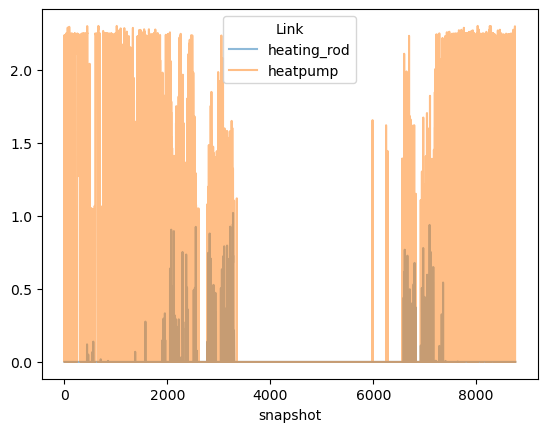

In [24]:
network.links_t.p0.loc[:,["heating_rod","heatpump"]].plot(alpha=0.5)

Ändern Sie das Netzwerk derart ab, sodass der Heizstab nur noch durch die PV-Erzeugung betrieben werden kann. <br>
Nutzen Sie das Attribut 'overwrite = True' damit Sie das Netzwerk nicht komplett neu aufbauen müssen.

In [25]:
model = network.optimize.create_model()

model_pv_p_nom  = model.variables["Generator-p_nom"]['PV']
model_col_p_nom = model.variables["Generator-p_nom"]['collector']

model_boiler_p  = model.variables["Generator-p"].sel(Generator='boiler')
model_hr_p      = model.variables["Link-p"].sel(Link='heating_rod')


constraint_expression = 20 >= model_pv_p_nom/pv_p_per_m2 + model_col_p_nom/col_p_per_m2
model.add_constraints(constraint_expression, name="Flächenbegrenzung")

con_ee_limit = sum(model_boiler_p[t] for t in df_data.index) <=  0.35 * df_data["heat_load"].sum()
model.add_constraints(con_ee_limit, name="EE-Limit")

network.optimize.solve_model(solver_name='gurobi', method = 1, threads = 1)

Index(['heating_rod', 'heatpump'], dtype='object', name='Link')
Index(['heat_store'], dtype='object', name='Store')
Index(['thermal', 'electricity'], dtype='object', name='Bus')
C:\Users\sarah\anaconda3\Lib\site-packages\linopy\variables.py:197: FutureWarning:

Accessing a single value with `Variable[...]` and return type ScalarVariable is deprecated. In future, this will return a Variable.To get a ScalarVariable use `Variable.at[...]` instead.

C:\Users\sarah\anaconda3\Lib\site-packages\linopy\variables.py:197: FutureWarning:

Accessing a single value with `Variable[...]` and return type ScalarVariable is deprecated. In future, this will return a Variable.To get a ScalarVariable use `Variable.at[...]` instead.

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - method: 1
 - threads: 1
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 103.36it/s]
INFO:linopy.io: Writing time: 1.06s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2694931


INFO:gurobipy:Set parameter LicenseID to value 2694931


Academic license - for non-commercial use only - expires 2026-08-11


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-11


Read LP format model from file C:\Users\sarah\AppData\Local\Temp\linopy-problem-z5ogi460.lp


INFO:gurobipy:Read LP format model from file C:\Users\sarah\AppData\Local\Temp\linopy-problem-z5ogi460.lp


Reading time = 0.24 seconds


INFO:gurobipy:Reading time = 0.24 seconds


obj: 157684 rows, 96362 columns, 305031 nonzeros


INFO:gurobipy:obj: 157684 rows, 96362 columns, 305031 nonzeros


Set parameter Method to value 1


INFO:gurobipy:Set parameter Method to value 1


Set parameter Threads to value 1


INFO:gurobipy:Set parameter Threads to value 1


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 7 5800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 7 5800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 8 physical cores, 16 logical processors, using up to 1 threads


INFO:gurobipy:Thread count: 8 physical cores, 16 logical processors, using up to 1 threads


INFO:gurobipy:


Non-default parameters:


INFO:gurobipy:Non-default parameters:


Method  1


INFO:gurobipy:Method  1


Threads  1


INFO:gurobipy:Threads  1


INFO:gurobipy:


Optimize a model with 157684 rows, 96362 columns and 305031 nonzeros


INFO:gurobipy:Optimize a model with 157684 rows, 96362 columns and 305031 nonzeros


Model fingerprint: 0x29ff7bc4


INFO:gurobipy:Model fingerprint: 0x29ff7bc4


Variable types: 70082 continuous, 26280 integer (26280 binary)


INFO:gurobipy:Variable types: 70082 continuous, 26280 integer (26280 binary)


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 6e+00]


INFO:gurobipy:  Matrix range     [1e-03, 6e+00]


  Objective range  [1e-01, 5e+01]


INFO:gurobipy:  Objective range  [1e-01, 5e+01]


  Bounds range     [1e+00, 1e+00]


INFO:gurobipy:  Bounds range     [1e+00, 1e+00]


  RHS range        [2e-03, 8e+03]


INFO:gurobipy:  RHS range        [2e-03, 8e+03]


Presolve removed 128198 rows and 46679 columns


INFO:gurobipy:Presolve removed 128198 rows and 46679 columns


Presolve time: 0.24s


INFO:gurobipy:Presolve time: 0.24s


Presolved: 29486 rows, 49683 columns, 106145 nonzeros


INFO:gurobipy:Presolved: 29486 rows, 49683 columns, 106145 nonzeros


Variable types: 40923 continuous, 8760 integer (8760 binary)


INFO:gurobipy:Variable types: 40923 continuous, 8760 integer (8760 binary)


INFO:gurobipy:


Root relaxation: objective 3.594056e+03, 13798 iterations, 0.12 seconds (0.18 work units)


INFO:gurobipy:Root relaxation: objective 3.594056e+03, 13798 iterations, 0.12 seconds (0.18 work units)


INFO:gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy:


     0     0 3594.05629    0 1096          - 3594.05629      -     -    0s


INFO:gurobipy:     0     0 3594.05629    0 1096          - 3594.05629      -     -    0s


H    0     0                    3676.5830507 3594.05629  2.24%     -    0s


INFO:gurobipy:H    0     0                    3676.5830507 3594.05629  2.24%     -    0s


H    0     0                    3671.5312530 3594.05629  2.11%     -    1s


INFO:gurobipy:H    0     0                    3671.5312530 3594.05629  2.11%     -    1s


H    0     0                    3670.7283006 3594.05629  2.09%     -    1s


INFO:gurobipy:H    0     0                    3670.7283006 3594.05629  2.09%     -    1s


H    0     0                    3670.7264867 3594.05629  2.09%     -    1s


INFO:gurobipy:H    0     0                    3670.7264867 3594.05629  2.09%     -    1s


H    0     0                    3669.9191238 3594.05629  2.07%     -    1s


INFO:gurobipy:H    0     0                    3669.9191238 3594.05629  2.07%     -    1s


     0     0 3605.20305    0  639 3669.91912 3605.20305  1.76%     -    1s


INFO:gurobipy:     0     0 3605.20305    0  639 3669.91912 3605.20305  1.76%     -    1s


H    0     0                    3614.8636069 3605.21678  0.27%     -    1s


INFO:gurobipy:H    0     0                    3614.8636069 3605.21678  0.27%     -    1s


     0     0 3605.32196    0  616 3614.86361 3605.32196  0.26%     -    1s


INFO:gurobipy:     0     0 3605.32196    0  616 3614.86361 3605.32196  0.26%     -    1s


     0     0 3605.32944    0  621 3614.86361 3605.32944  0.26%     -    1s


INFO:gurobipy:     0     0 3605.32944    0  621 3614.86361 3605.32944  0.26%     -    1s


     0     0 3605.32979    0  623 3614.86361 3605.32979  0.26%     -    1s


INFO:gurobipy:     0     0 3605.32979    0  623 3614.86361 3605.32979  0.26%     -    1s


     0     0 3606.48174    0  468 3614.86361 3606.48174  0.23%     -    1s


INFO:gurobipy:     0     0 3606.48174    0  468 3614.86361 3606.48174  0.23%     -    1s


     0     0 3606.53670    0  443 3614.86361 3606.53670  0.23%     -    1s


INFO:gurobipy:     0     0 3606.53670    0  443 3614.86361 3606.53670  0.23%     -    1s


     0     0 3606.53923    0  448 3614.86361 3606.53923  0.23%     -    1s


INFO:gurobipy:     0     0 3606.53923    0  448 3614.86361 3606.53923  0.23%     -    1s


     0     0 3606.76206    0  339 3614.86361 3606.76206  0.22%     -    2s


INFO:gurobipy:     0     0 3606.76206    0  339 3614.86361 3606.76206  0.22%     -    2s


H    0     0                    3609.8272951 3606.76269  0.08%     -    2s


INFO:gurobipy:H    0     0                    3609.8272951 3606.76269  0.08%     -    2s


     0     0 3606.77157    0  335 3609.82730 3606.77157  0.08%     -    2s


INFO:gurobipy:     0     0 3606.77157    0  335 3609.82730 3606.77157  0.08%     -    2s


     0     0 3606.77197    0  346 3609.82730 3606.77197  0.08%     -    2s


INFO:gurobipy:     0     0 3606.77197    0  346 3609.82730 3606.77197  0.08%     -    2s


     0     0 3606.81593    0  326 3609.82730 3606.81593  0.08%     -    2s


INFO:gurobipy:     0     0 3606.81593    0  326 3609.82730 3606.81593  0.08%     -    2s


H    0     0                    3609.2195430 3606.81607  0.07%     -    2s


INFO:gurobipy:H    0     0                    3609.2195430 3606.81607  0.07%     -    2s


H    0     0                    3609.2186500 3606.81607  0.07%     -    2s


INFO:gurobipy:H    0     0                    3609.2186500 3606.81607  0.07%     -    2s


     0     0 3606.81822    0  320 3609.21865 3606.81822  0.07%     -    2s


INFO:gurobipy:     0     0 3606.81822    0  320 3609.21865 3606.81822  0.07%     -    2s


     0     0 3606.82043    0  286 3609.21865 3606.82043  0.07%     -    3s


INFO:gurobipy:     0     0 3606.82043    0  286 3609.21865 3606.82043  0.07%     -    3s


H    0     0                    3608.7133498 3606.82057  0.05%     -    3s


INFO:gurobipy:H    0     0                    3608.7133498 3606.82057  0.05%     -    3s


     0     0 3606.82086    0  292 3608.71335 3606.82086  0.05%     -    3s


INFO:gurobipy:     0     0 3606.82086    0  292 3608.71335 3606.82086  0.05%     -    3s


     0     0 3606.82250    0  293 3608.71335 3606.82250  0.05%     -    3s


INFO:gurobipy:     0     0 3606.82250    0  293 3608.71335 3606.82250  0.05%     -    3s


     0     0 3606.82280    0  291 3608.71335 3606.82280  0.05%     -    3s


INFO:gurobipy:     0     0 3606.82280    0  291 3608.71335 3606.82280  0.05%     -    3s


     0     0 3606.82386    0  282 3608.71335 3606.82386  0.05%     -    3s


INFO:gurobipy:     0     0 3606.82386    0  282 3608.71335 3606.82386  0.05%     -    3s


     0     0 3606.82402    0  265 3608.71335 3606.82402  0.05%     -    3s


INFO:gurobipy:     0     0 3606.82402    0  265 3608.71335 3606.82402  0.05%     -    3s


     0     2 3606.82417    0  264 3608.71335 3606.82417  0.05%     -    4s


INFO:gurobipy:     0     2 3606.82417    0  264 3608.71335 3606.82417  0.05%     -    4s


H   26    26                    3608.6437591 3606.82417  0.05%   3.7    4s


INFO:gurobipy:H   26    26                    3608.6437591 3606.82417  0.05%   3.7    4s


H   54    54                    3608.4921008 3606.82417  0.05%   4.0    5s


INFO:gurobipy:H   54    54                    3608.4921008 3606.82417  0.05%   4.0    5s


H  297   297                    3608.4910346 3606.82417  0.05%   4.3    6s


INFO:gurobipy:H  297   297                    3608.4910346 3606.82417  0.05%   4.3    6s


H  351   351                    3608.4632622 3606.82417  0.05%   4.8    7s


INFO:gurobipy:H  351   351                    3608.4632622 3606.82417  0.05%   4.8    7s


H  378   378                    3608.4050739 3606.82417  0.04%   4.9    7s


INFO:gurobipy:H  378   378                    3608.4050739 3606.82417  0.04%   4.9    7s


H  459   459                    3608.3934746 3606.82417  0.04%   4.9    7s


INFO:gurobipy:H  459   459                    3608.3934746 3606.82417  0.04%   4.9    7s


H  486   486                    3608.3773879 3606.82417  0.04%   4.9    7s


INFO:gurobipy:H  486   486                    3608.3773879 3606.82417  0.04%   4.9    7s


H  540   540                    3608.3772128 3606.82417  0.04%   5.4    8s


INFO:gurobipy:H  540   540                    3608.3772128 3606.82417  0.04%   5.4    8s


*  646   606             449    3608.1902263 3606.82417  0.04%   5.1    8s


INFO:gurobipy:*  646   606             449    3608.1902263 3606.82417  0.04%   5.1    8s


   651   606 3607.79957  253  265 3608.19023 3606.82418  0.04%   5.1   10s


INFO:gurobipy:   651   606 3607.79957  253  265 3608.19023 3606.82418  0.04%   5.1   10s


   680   625 3607.24393   41  169 3608.19023 3607.24393  0.03%   4.9   15s


INFO:gurobipy:   680   625 3607.24393   41  169 3608.19023 3607.24393  0.03%   4.9   15s


H  684   596                    3608.0325151 3607.25062  0.02%   4.9   16s


INFO:gurobipy:H  684   596                    3608.0325151 3607.25062  0.02%   4.9   16s


H  684   565                    3607.9519230 3607.25062  0.02%   4.9   16s


INFO:gurobipy:H  684   565                    3607.9519230 3607.25062  0.02%   4.9   16s


H  686   537                    3607.9518573 3607.25062  0.02%   4.8   16s


INFO:gurobipy:H  686   537                    3607.9518573 3607.25062  0.02%   4.8   16s


H  686   510                    3607.8657447 3607.25062  0.02%   4.8   16s


INFO:gurobipy:H  686   510                    3607.8657447 3607.25062  0.02%   4.8   16s


H  689   486                    3607.8655233 3607.25104  0.02%   4.8   17s


INFO:gurobipy:H  689   486                    3607.8655233 3607.25104  0.02%   4.8   17s


   705   498 3607.25148   10  166 3607.86552 3607.25148  0.02%  39.1   20s


INFO:gurobipy:   705   498 3607.25148   10  166 3607.86552 3607.25148  0.02%  39.1   20s


H  710   476                    3607.8477216 3607.26049  0.02%  38.9   21s


INFO:gurobipy:H  710   476                    3607.8477216 3607.26049  0.02%  38.9   21s


H  710   452                    3607.8461277 3607.26049  0.02%  38.9   21s


INFO:gurobipy:H  710   452                    3607.8461277 3607.26049  0.02%  38.9   21s


H  718   434                    3607.8436161 3607.26049  0.02%  38.4   23s


INFO:gurobipy:H  718   434                    3607.8436161 3607.26049  0.02%  38.4   23s


   720   435 3607.80632  262  145 3607.84362 3607.26059  0.02%  38.3   25s


INFO:gurobipy:   720   435 3607.80632  262  145 3607.84362 3607.26059  0.02%  38.3   25s


H  720   413                    3607.7941741 3607.26059  0.01%  38.3   25s


INFO:gurobipy:H  720   413                    3607.7941741 3607.26059  0.01%  38.3   25s


H  720   392                    3607.7462737 3607.26059  0.01%  38.3   25s


INFO:gurobipy:H  720   392                    3607.7462737 3607.26059  0.01%  38.3   25s


   846   467 3607.62291   88  128 3607.74627 3607.26322  0.01%  59.9   30s


INFO:gurobipy:   846   467 3607.62291   88  128 3607.74627 3607.26322  0.01%  59.9   30s


H  937   492                    3607.6890425 3607.26322  0.01%  54.9   32s


INFO:gurobipy:H  937   492                    3607.6890425 3607.26322  0.01%  54.9   32s


H  964   482                    3607.6799387 3607.26322  0.01%  53.6   33s


INFO:gurobipy:H  964   482                    3607.6799387 3607.26322  0.01%  53.6   33s


H  971   459                    3607.6414378 3607.26322  0.01%  53.3   34s


INFO:gurobipy:H  971   459                    3607.6414378 3607.26322  0.01%  53.3   34s


H  991   449                    3607.6337735 3607.26322  0.01%  52.3   34s


INFO:gurobipy:H  991   449                    3607.6337735 3607.26322  0.01%  52.3   34s


   994   452 3607.58708  166   36 3607.63377 3607.26322  0.01%  52.2   35s


INFO:gurobipy:   994   452 3607.58708  166   36 3607.63377 3607.26322  0.01%  52.2   35s


* 1062   431             200    3607.5818704 3607.26322  0.01%  49.1   36s


INFO:gurobipy:* 1062   431             200    3607.5818704 3607.26322  0.01%  49.1   36s


INFO:gurobipy:


Cutting planes:


INFO:gurobipy:Cutting planes:


  Gomory: 131


INFO:gurobipy:  Gomory: 131


  Cover: 7


INFO:gurobipy:  Cover: 7


  Implied bound: 162


INFO:gurobipy:  Implied bound: 162


  Projected implied bound: 21


INFO:gurobipy:  Projected implied bound: 21


  Clique: 1


INFO:gurobipy:  Clique: 1


  MIR: 470


INFO:gurobipy:  MIR: 470


  Mixing: 19


INFO:gurobipy:  Mixing: 19


  Flow cover: 1334


INFO:gurobipy:  Flow cover: 1334


  RLT: 165


INFO:gurobipy:  RLT: 165


  Relax-and-lift: 73


INFO:gurobipy:  Relax-and-lift: 73


INFO:gurobipy:


Explored 1063 nodes (77493 simplex iterations) in 36.06 seconds (39.93 work units)


INFO:gurobipy:Explored 1063 nodes (77493 simplex iterations) in 36.06 seconds (39.93 work units)


Thread count was 1 (of 16 available processors)


INFO:gurobipy:Thread count was 1 (of 16 available processors)


INFO:gurobipy:


Solution count 10: 3607.58 3607.63 3607.64 ... 3607.85


INFO:gurobipy:Solution count 10: 3607.58 3607.63 3607.64 ... 3607.85


INFO:gurobipy:


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy:Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy:Warning: max constraint violation (3.6727e-06) exceeds tolerance


Best objective 3.607581868466e+03, best bound 3.607263223205e+03, gap 0.0088%


INFO:gurobipy:Best objective 3.607581868466e+03, best bound 3.607263223205e+03, gap 0.0088%
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 96362 primals, 0 duals
Objective: 3.61e+03
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:No shadow prices were assigned to the network.


('ok', 'optimal')

Erzeugen Sie sich erneut eine Kopie des Netzwerks als Modell und fügen die notwendigen Nebenbedingungen hinzu

In [26]:
print("Genutzte Dachfläche:",round(network.generators.p_nom_opt.PV / pv_p_per_m2 + network.generators.p_nom_opt.collector / col_p_per_m2,2),"m2")
print("Nicht-EE-Anteil:",round(network.generators_t.p.boiler.sum() / df_data["heat_load"].sum()*100,2),"%")


Genutzte Dachfläche: 20.0 m2
Nicht-EE-Anteil: 35.0 %


Überprüfen Sie ob die Nebenbedingungen eingehalten wurden und lassen Sie sich die Leistung der Wärmepumpe und des Heizstabs plotten

<Axes: xlabel='snapshot'>

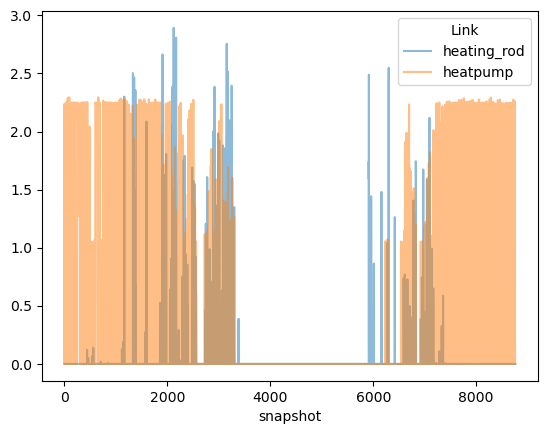

In [27]:
network.links_t.p0.loc[:,["heating_rod","heatpump"]].plot(alpha=0.5)